In [1]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

In [2]:
from dask import distributed as dds
from dask import delayed
import time

# Setting up cluster

In [3]:
cluster = dds.LocalCluster()
#client = dds.Client(cluster)
client = dds.Client('tcp://127.0.0.1:50024')
client

Client Scheduler: tcp://127.0.0.1:50024 Dashboard: http://127.0.0.1:8787,Cluster Workers: 4 Cores: 4 Memory: 8.49 GB


# Tree reduction task

In [4]:
def slowadd(x, y, delay=0.1):
    time.sleep(delay)
    return x + y

## Sequential version

In [5]:
problem_size = 64

In [22]:
%%time
L = range(problem_size)

while len(L) > 1:  # while there is more than one element left
    # add neighbors together
    L = [slowadd(a, b) for a, b in zip(L[::2], L[1::2])]

print('res =', L[0])

res = 8128
Wall time: 13.3 s


## Dask version

In [8]:
L = range(problem_size)

while len(L) > 1:  # while there is more than one element left
    # add neighbors together
    L = [delayed(slowadd)(a, b) for a, b in zip(L[::2], L[1::2])]

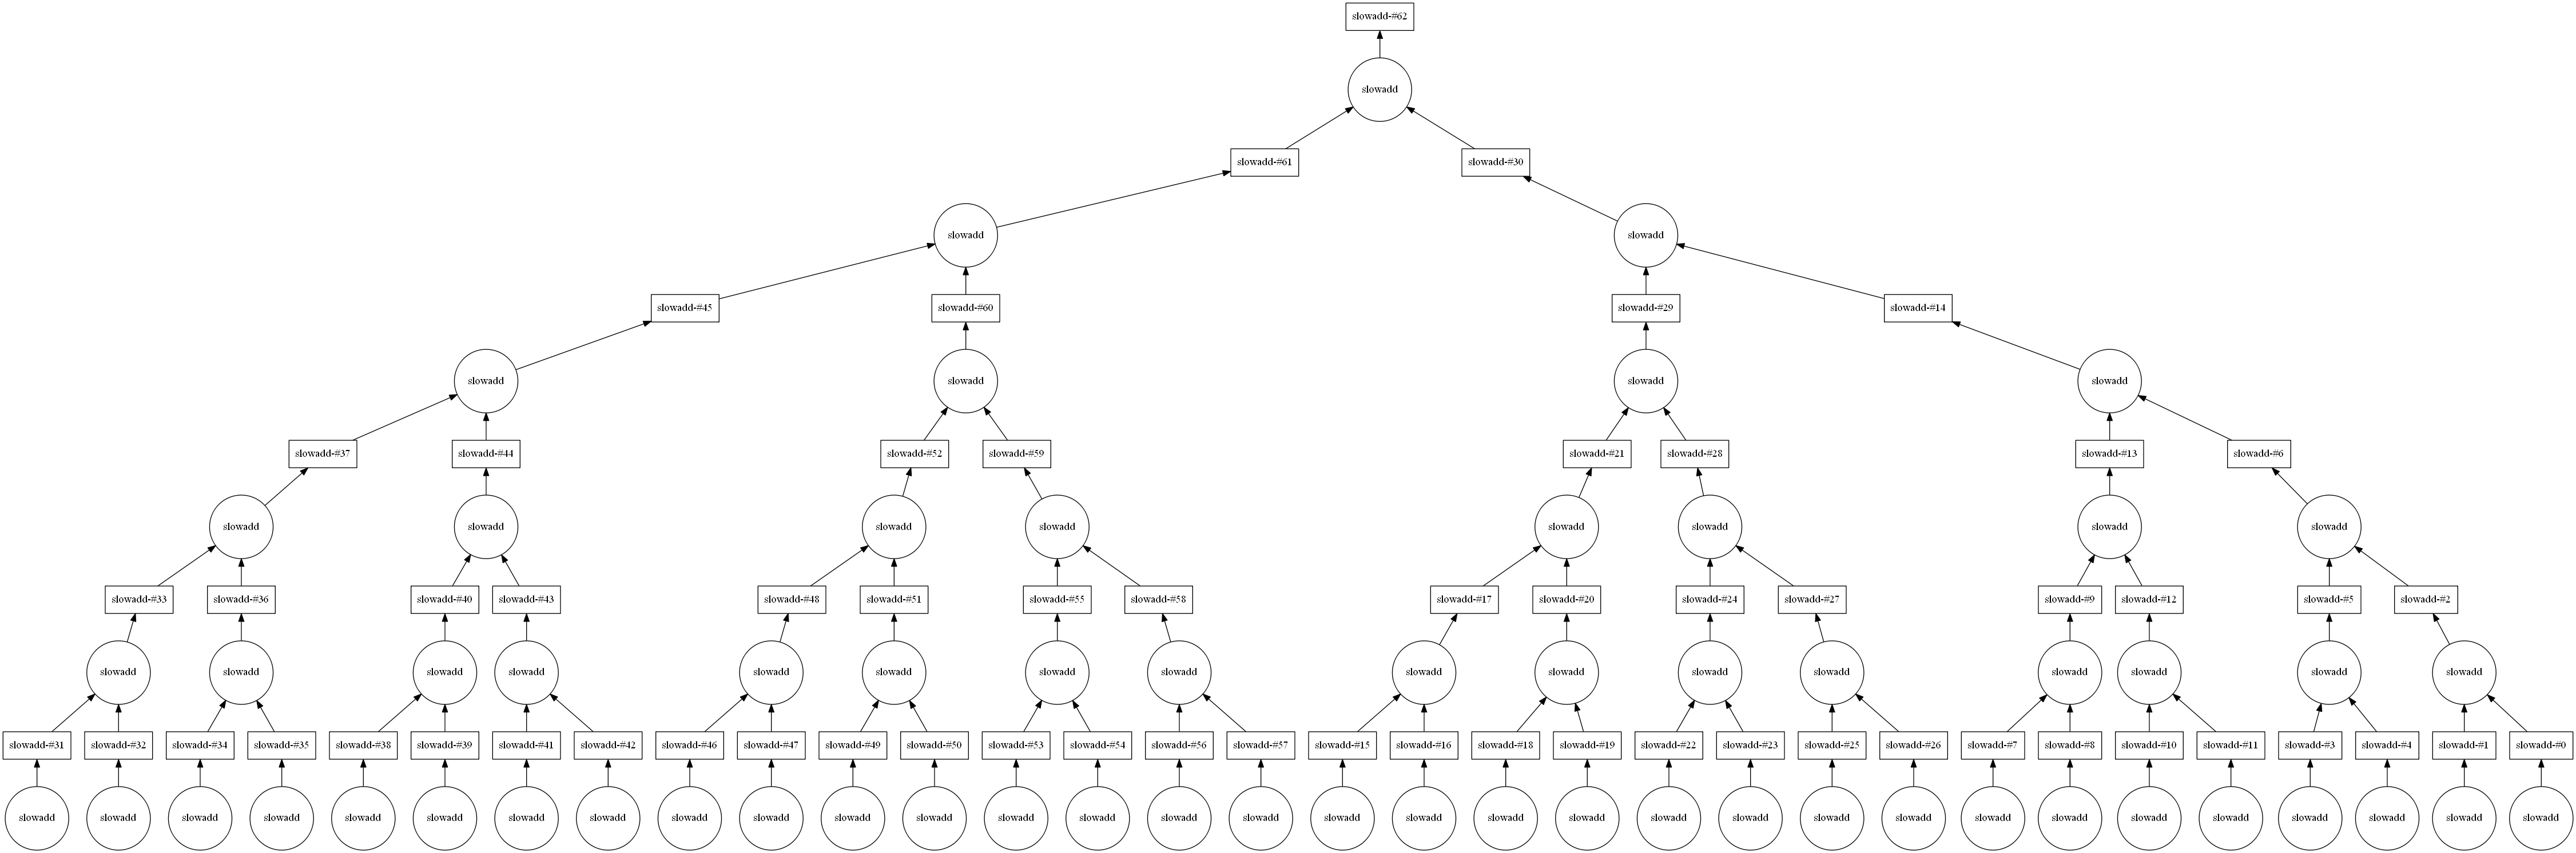

In [7]:
L[0].visualize()

In [28]:
%%time
res = L[0].compute()
print('res =', res)

res = 8128
Wall time: 4.25 s


# Sequential Task

In [52]:
def inc(x):
    return x + 1

In [53]:
%%time
x = 1
for i in range(100):
    x = inc(x)
x

Wall time: 0 ns


In [54]:
%%time
x = 1
for i in range(100):
    x = delayed(inc)(x)
x.compute()

Wall time: 1.67 s


tornado.application - ERROR - Exception in callback functools.partial(<function wrap.<locals>.null_wrapper at 0x000002FBD9CC5AE8>, <tornado.concurrent.Future object at 0x000002FBDC838240>)
Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\distributed\comm\tcp.py", line 174, in read
    n_frames = yield stream.read_bytes(8)
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\iostream.py", line 324, in read_bytes
    self._try_inline_read()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\iostream.py", line 709, in _try_inline_read
    self._check_closed()
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\tornado\iostream.py", line 925, in _check_closed
    raise StreamClosedError(real_error=self.error)
tornado.iostream.StreamClosedError: Stream is closed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\mkosturek\Anaconda3\lib\site-packages\distri